In [1]:
import sys
!{sys.executable} -m pip install --upgrade https://github.com/aparrish/bezmerizing/archive/master.zip

  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip
  Created wheel for bezmerizing: filename=bezmerizing-0.1.1-py3-none-any.whl size=17284 sha256=d8d0ca21fb4e3019caa80bf9b8a9496fe61c47ee3d6793c452b41eb1b274406c
  Stored in directory: /private/var/folders/zw/zqwd5pss4wnbkjr938715lkc0000gn/T/pip-ephem-wheel-cache-xojkfs2u/wheels/74/5a/7d/4a62c2490b6c6061916e41ae070caaed12664893aef1a56d7c
Successfully built bezmerizing
  Attempting uninstall: bezmerizing
    Found existing installation: bezmerizing 0.1.1
    Uninstalling bezmerizing-0.1.1:
      Successfully uninstalled bezmerizing-0.1.1


In [2]:
# import serial
# serial = serial.Serial("/dev/tty.usbmodem14301")

In [3]:
from flat import document, rgb, rgba, font, strike, shape
from flat.command import moveto, quadto, curveto, lineto, closepath
from bezmerizing import Polyline, Path
import numpy as np
from copy import copy
from numpy.random import uniform, normal, choice

In [4]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [5]:
f = font.open('VT323-Regular.ttf')

In [48]:
def glyphcommands(f, ch):
    return Path([copy(cmd) for cmd in f.glyph(f.charmap[ord(ch)])])
def advancefor(f, ch):
    return f.advances[f.charmap[ord(ch)]]

In [136]:
def getCommandsFromFont(text, font):
    t = open('/Users/samheckle/Documents/school/spring 2021/printerRobot/letterCommands.h', "w")
    
    startX = 0
    
    myText = text #the text to manipulate
    numLets = len(myText)

    letterCommands = []

    for i in range(numLets): #for every letter:
        letter = glyphcommands(font,myText[i]).commands #get glyph commands for that letter
        for j in range(len(letter)): #for each command: 
            if (hasattr(letter[j], "x") and hasattr(letter[j], "y")): #if command is NOT closepath:
                x = letter[j].x+startX
                y = letter[j].y
                letterCommands.append([x-36,(y+560)*-1])
            if (letter[j] == letter[-1]): #if command is the last in the letter:
                startX+=350
    
    commandsString = "int letterCommands[][2] = " + str(letterCommands).replace('[', "{").replace("]","}")+";"
#     print(letterCommands)
    return letterCommands

        
getCommandsFromFont("t", f)

[[197.0, -87.0],
 [202, -62],
 [161, -61],
 [135, -56],
 [117, -42],
 [132, 8],
 [140, 18],
 [146, 29],
 [130, 48],
 [99, 26],
 [92.5, 10.0],
 [80, -19],
 [68.0, -46.0],
 [59, -62],
 [48.5, -74.5],
 [24, -100],
 [-7, -132],
 [21, -163],
 [21, -183],
 [28, -201],
 [28, -365],
 [14, -443],
 [14, -469],
 [78, -508],
 [82.0, -520.5],
 [86.5, -535.5],
 [92.0, -549.0],
 [98, -556],
 [160, -499],
 [191, -432],
 [167.0, -438.5],
 [153, -446],
 [131, -421],
 [120, -385],
 [109, -269],
 [122, -167],
 [121.0, -159.0],
 [120, -154],
 [145, -142],
 [163, -147],
 [191, -112],
 [197.0, -87.0]]

In [8]:
import json
import markovify

# Get raw text as string.
with open("corpus.txt") as f:
    text = f.read()

# Build the model.
text_model = markovify.NewlineText(text)

print(text_model)
model_json = text_model.to_json()

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence(tries=100))

# # Print three randomly-generated sentences of no more than 280 characters
# for i in range(3):
#     print(text_model.make_short_sentence(140, state_size=2))

When the day of Pentecost came, they were sitting. Acts 2:1-2
The Lord gives strength to his people; the Lord is the one who sustains me. Psalm 54:4
Surely God is my help; the Lord blesses his people with peace. Psalm 29:11
When the day of Pentecost came, they were sitting. Acts 2:1-2
The Lord gives strength to his people; the Lord is the one who sustains me. Psalm 54:4


In [9]:
import xml.etree.ElementTree as ET
lang = 'English'
root = ET.fromstring(open(lang + '.xml').read())
with open(lang + '.txt', 'w', encoding='utf-8') as out:
    for n in root.iter('seg'):
        out.write(n.text.strip() + '\n')


In [10]:
import json
import markovify
import random

# Opening JSON file
f = open('verses.json')

data = json.load(f)

print(data[0]["book"])

# Get raw text as string.
with open("English.txt") as f:
    text = f.read()

# Build the model.
text_model = markovify.NewlineText(text)

print(text_model)
model_json = text_model.to_json()

print(random.randrange(int(data[random.randrange(65)]['chapter'])))

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence() + " " + data[random.randrange(65)]['book'] 
          + " " + str(random.randrange(int(data[random.randrange(65)]['chapter']))))

# # Print three randomly-generated sentences of no more than 280 characters
# for i in range(3):
#     print(text_model.make_short_sentence(140, state_size=2))

Genesis
0
Ye mountains, that ye abode in Shittim, and the mercy seat of pure gold: of beaten gold went to prayer, and watch with me. Colossians 0
And when Phinehas, the son of Jehoahaz, the youngest of his fathers. Mark 41
And for a testimony, when he saw him, he maketh the sea shall be mine, saith the LORD. Galatians 351
Once have I not drink of the Moabites at that time there arose a dissension between the teeth of the ark; Esther 0
I am ashamed and blush to lift up a curse for us: and the thing be hid from thee, and sojourners, as were all the congregation worshipped, and returned to Ekron the same flesh: but envy the rottenness of the LORD; Ask ye now, and see that ye die not: Exodus 400


In [11]:
import json
import markovify
import random

# Opening JSON file
f = open('verses.json')

data = json.load(f)

# Get raw text as string.
with open("English.txt") as f:
    text = f.read()

# Build the model.
text_model = markovify.NewlineText(text)

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence() + " " + data[random.randrange(64)]['book'] 
          + " " + str(random.randrange(int(data[random.randrange(64)]['chapter'])))
          + ":" + str(random.randrange(int(data[random.randrange(64)]['verse'])))
         + "\n")


Thou hast covered him with his finger in water, and mar every good work: 1 Timothy 6:6

And the king made a breach ready to perish was my portion of them that fear thee will I recompense upon his arm, and upon the top of the LORD, saying, Song of Solomon 12:413

But he answered him, The LORD shall rise up against him. Now he that sprinkleth the blood of the children of Parosh, two thousand and six men: for all these great things, and we will build them, and I did blow with a staff, or that is baken in the day of judgment, the thrones were cast into the field, till there stood up to the earth. Luke 4:2

Then the priest shall make haste; thy destroyers and they came up to mount Tabor. Ezekiel 16:695

So the king said unto him, Thus saith the LORD. Ezekiel 1:746



In [12]:
# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_short_sentence(140) + " " + data[random.randrange(64)]['book'] 
          + " " + str(random.randrange(int(float(data[random.randrange(64)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randrange(64)]['verse']))))
         + "\n")

And he brake it, and his wrath: Malachi 23:73

Not according to thy wife; 2 Peter 1:17

And the inhabitant from the north northward, and said unto Jesus, Lord, and to his birthright, and the physicians embalmed Israel. Acts 18:533

O praise the LORD said unto them, Lodge here this day, to the top of Carmel, one; Amos 2:47

As a beast shall go to Bethlehem: 1 Samuel 14:182



In [13]:
verses = []

# Print five randomly-generated sentences
for i in range(5):
    verses.append(text_model.make_short_sentence(140) + " " + data[random.randrange(64)]['book'] 
          + " " + str(random.randrange(int(float(data[random.randrange(64)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randrange(64)]['verse']))))
         + "\n")
    print(verses[i])

And I will set my feet with her suburbs: Deuteronomy 2:26

And the residue of the LORD do so to me, and have followed thee. 1 John 6:154

And he said, These two nations and these cattle are ringstraked, speckled, and grisled. Jeremiah 6:258

For there is not mine, but his brethren and thy want as an hidden untimely birth of a great slaughter. Genesis 22:541

But if any hand be heavy upon them hath declared how God was risen upon thee. Ruth 1:73



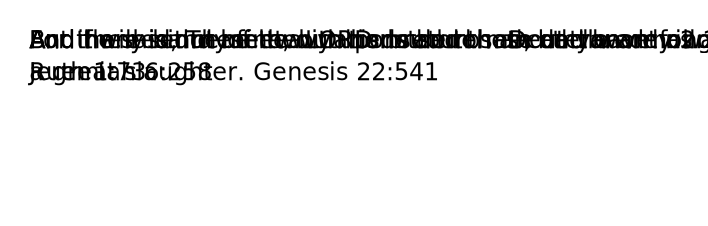

In [24]:


f = font.open("./GebetbuchFraktur.ttf")

d = document(250, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
text_pen = strike(f).color(rgba(0, 0, 0, 255)).size(24, 32)

for i in range(len(verses)):
    page.place(text_pen.text(verses[i])).frame(10, 10, 260, 60)
show(page)

Clouds and darkness was under their wings. Titus 1:446

And they went from him, and sent him out of the herd, and fetcht a calf and a stranger in the ears of corn. 2 Kings 1:556

Moreover the Nethinims dwelt in the third day. Numbers 1:190

All the oxen for an everlasting name? Song of Solomon 0:17

They shall take hold on his father's servants had violently taken away. 1 Thessalonians 0:902



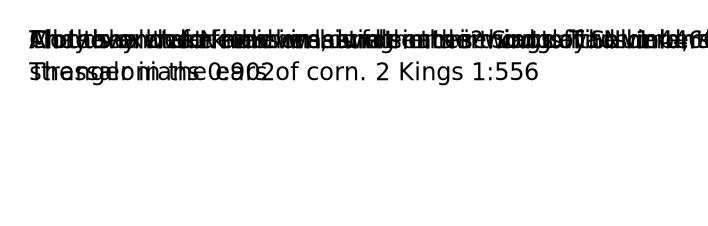

In [34]:
random.seed(40)
random_index = random.randint(0,65)

verses = []

# Print five randomly-generated sentences
for i in range(5):
    verses.append(text_model.make_short_sentence(140) + " " + data[random.randint(0,random_index)]['book'] 
          + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse']))))
         + "\n")
    print(verses[i])

f = font.open("./GebetbuchFraktur.ttf")

d = document(250, 80, 'mm')
page = d.addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(128, 128, 128, 255)).width(4)
text_pen = strike(f).color(rgba(0, 0, 0, 255)).size(24, 32)

for i in range(len(verses)):
    page.place(text_pen.text(verses[i])).frame(10, 10, 260, 60)
show(page)

In [120]:
verses = []

# Print five randomly-generated sentences
for i in range(5):
    verses.append(text_model.make_short_sentence(140) + " " + data[random.randint(0,random_index)]['book'] 
          + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

def getCommandsFromFont(text, font):
    startX = 0
    
    myText = text #the text to manipulate
    numLets = len(myText)

    letterCommands = []

    for i in range(numLets): #for every letter:
        letter = glyphcommands(font,myText[i]).commands #get glyph commands for that letter
        for j in range(len(letter)): #for each command: 
            if (hasattr(letter[j], "x") and hasattr(letter[j], "y")): #if command is NOT closepath:
                x = letter[j].x+startX
                y = letter[j].y
                letterCommands.append([x-36,(y+560)*-1])
            if (letter[j] == letter[-1]): #if command is the last in the letter:
                startX+=350
    
    commandsString = "int letterCommands[][2] = " + str(letterCommands).replace('[', "{").replace("]","}")+";"
#     print(letterCommands)
    return letterCommands

f = font.open("./GebetbuchFraktur.ttf")
getCommandsFromFont(verses[0], f)

[[493, 55], [525, 109], [513.0, 117.0], [484, 137], [435, 163], [360.0, 131.0], [319, 66], [327, 14], [336, -35], [345, -156], [312, -299], [216, -403], [234, -373], [262, -342], [284.5, -310.5], [303, -283], [319, -174], [287, 15], [224, 103], [130, 152], [50, 117], [-13, 77], [-35, 4], [15, -92], [83, -173], [18, -279], [9, -336], [29.5, -392.0], [84, -414], [143, -379], [162, -308], [116, -174], [121.0, -163.0], [136, -130], [157, -54], [58, 1], [43, -20], [64, -25], [92, -16], [125.5, -30.5], [139, -65], [130, -109], [98, -146], [25, -70], [-11, 17], [76, 81], [200, -9], [230, -148], [230, -203], [207, -312], [188.5, -368.0], [172.0, -409.0], [131, -449], [99.5, -474.0], [80, -493], [131, -466], [179, -449], [279, -501], [369, -552], [423, -518], [466, -473], [441, -473], [359, -450], [287, -386], [304, -352], [329, -306], [338.0, -279.0], [345, -259], [384, -216], [416, -240], [430, -279], [472, -236], [488.0, -207.5], [504, -179], [449, -153], [438, -116], [406, -154], [371, -185

[[493, 55],
 [525, 109],
 [513.0, 117.0],
 [484, 137],
 [435, 163],
 [360.0, 131.0],
 [319, 66],
 [327, 14],
 [336, -35],
 [345, -156],
 [312, -299],
 [216, -403],
 [234, -373],
 [262, -342],
 [284.5, -310.5],
 [303, -283],
 [319, -174],
 [287, 15],
 [224, 103],
 [130, 152],
 [50, 117],
 [-13, 77],
 [-35, 4],
 [15, -92],
 [83, -173],
 [18, -279],
 [9, -336],
 [29.5, -392.0],
 [84, -414],
 [143, -379],
 [162, -308],
 [116, -174],
 [121.0, -163.0],
 [136, -130],
 [157, -54],
 [58, 1],
 [43, -20],
 [64, -25],
 [92, -16],
 [125.5, -30.5],
 [139, -65],
 [130, -109],
 [98, -146],
 [25, -70],
 [-11, 17],
 [76, 81],
 [200, -9],
 [230, -148],
 [230, -203],
 [207, -312],
 [188.5, -368.0],
 [172.0, -409.0],
 [131, -449],
 [99.5, -474.0],
 [80, -493],
 [131, -466],
 [179, -449],
 [279, -501],
 [369, -552],
 [423, -518],
 [466, -473],
 [441, -473],
 [359, -450],
 [287, -386],
 [304, -352],
 [329, -306],
 [338.0, -279.0],
 [345, -259],
 [384, -216],
 [416, -240],
 [430, -279],
 [472, -236],
 [488.0,

In [6]:
verses = []

# Print five randomly-generated sentences
for i in range(5):
    verses.append(text_model.make_short_sentence(140) + " " + data[random.randint(0,random_index)]['book'] 
          + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

def getCommandsPolyline(text, font):
    startX = 0
    
    myText = text #the text to manipulate
    numLets = len(myText)

    letterCommands = []

    for i in range(numLets): #for every letter:
        letter = glyphcommands(font,myText[i]).commands #get glyph commands for that letter
        for j in range(len(letter)): #for each command: 
            if (hasattr(letter[j], "x") and hasattr(letter[j], "y")): #if command is NOT closepath:
                x = letter[j].x+startX
                y = letter[j].y
                letterCommands.append([x-36,(y+560)])
            if (letter[j] == letter[-1]): #if command is the last in the letter:
                startX+=350
    
    commandsString = "int letterCommands[][2] = " + str(letterCommands).replace('[', "{").replace("]","}")+";"
#     print(letterCommands)
    return letterCommands

f = font.open("./GebetbuchFraktur.ttf")

NameError: name 'text_model' is not defined

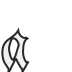

In [62]:
a_glyph = Path(f.glyph(f.charmap[ord("a")]))
a_glyph = a_glyph.translate(0, f.density).scale(72 / f.density)
page = document(72, 72, 'pt').addpage()
pen = shape().stroke(rgb(40, 40, 40)).fill(rgb(240, 240, 240)).width(2)
page.place(pen.path(a_glyph))
show(page)

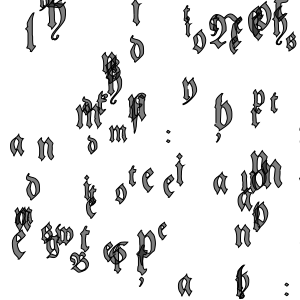

In [65]:
s = verses[0]
page = document(300, 300, 'pt').addpage()
pen = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(0, 0, 0, 128))
factor = 36 / f.density
cx = 0
for ch in s:
    glyph_path = (glyphcommands(f, ch)
                  .scale(factor * uniform(0.75, 1.5))
                  .translate(factor + uniform(300), factor + uniform(300)))
    page.place(pen.path(glyph_path))
    cx += advancefor(f, ch) * factor
show(page)

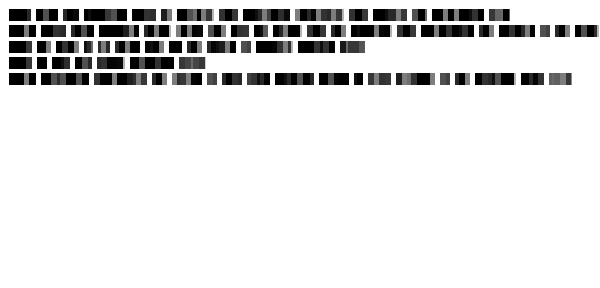

In [70]:
width = 600 # 5in
height = 288 # 4in
border = 9 # 1/8in
lineheight = 16 # size of each line
rectsize = 12 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        path_len = len(glyphcommands(f, ch).commands)
        val = 255 - (path_len * 5)
        advance = advancefor(f, ch) / f.density * lineheight
        brush = shape().nostroke().fill(rgb(val, val, val))
        page.place(brush.polyline())
        xoff += int(advance)
    xoff = border
    yoff += lineheight
show(page)

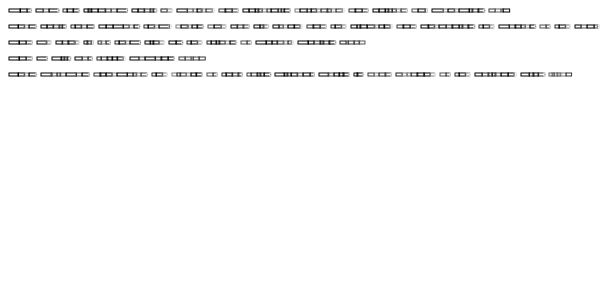

In [77]:
width = 600 # 5in
height = 288 # 4in
border = 9 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        path_len = len(glyphcommands(f, ch).commands)
        val = 255 - (path_len * 5)
        advance = advancefor(f, ch) / f.density * lineheight
        brush = shape().stroke(rgb(val, val, val))
        page.place(brush.rectangle(xoff, yoff, advance, rectsize))
        xoff += int(advance)
    xoff = border
    yoff += lineheight
show(page)

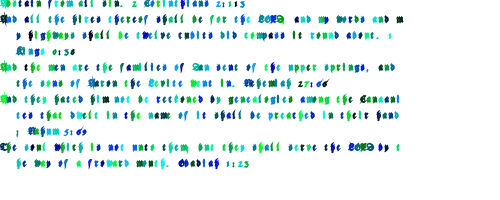

In [193]:
width = 500 # 5in
height = 200 # 4in
border = 1 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
#             advance = advancefor(f, ch) / f.density * lineheight
            figure = shape().stroke(rgb(0, random.randint(0,255), random.randint(0,255)))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

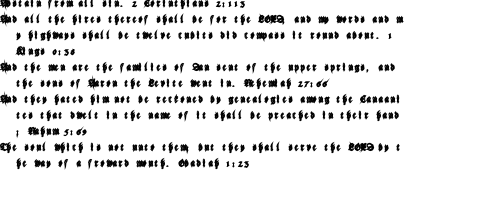

In [194]:
width = 500 # 5in
height = 200 # 4in
border = 1 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
#             advance = advancefor(f, ch) / f.density * lineheight
            figure = shape().stroke(rgb(0, 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

In [5]:
width = 500 # 5in
height = 200 # 4in
border = 1 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
#             advance = advancefor(f, ch) / f.density * lineheight
            figure = shape().stroke(rgb(0, 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

NameError: name 'verses' is not defined

In [1]:
with open("test.svg", "wb") as fh:
    fh.write(page.svg())

NameError: name 'page' is not defined

# VIOLA SAID THE BIBLE IS MEANT TO BE RED
READ

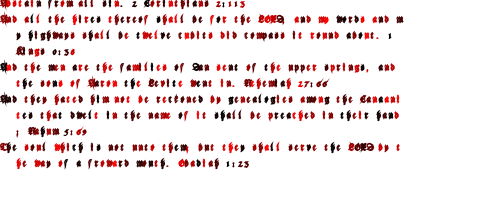

In [195]:
width = 500 # 5in
height = 200 # 4in
border = 1 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

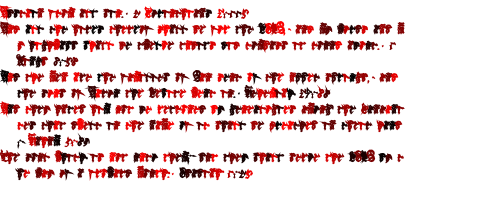

In [202]:
width = 500 # 5in
height = 200 # 4in
border = 2 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            page.place(lines)
            lines = figure.polyline(pline.rotate(uniform(.5*np.pi)).scale(.01).translate(xoff,yoff))
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

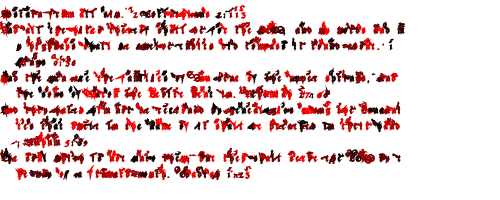

In [203]:
width = 500 # 5in
height = 200 # 4in
border = 2 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
            page.place(lines)
            lines = figure.polyline(pline.rotate(uniform(2*np.pi)).scale(.01).translate(xoff,yoff))
            page.place(lines)
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

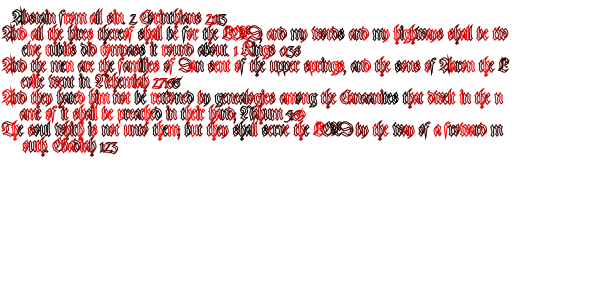

In [223]:
width = 600 # 5in
height = 300 # 4in
border = 3 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border+10
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.02).translate(xoff,yoff))
            page.place(lines)
        advance = advancefor(f, ch) / f.density * lineheight
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

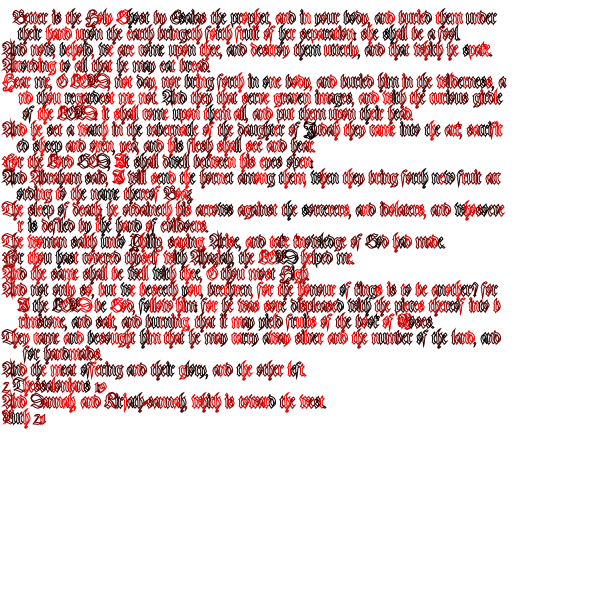

In [238]:
verses = []

num = 15
for i in range(num):
    verses.append(text_model.make_short_sentence(280))
    if(i >= num-2):
        verses.append(data[random.randint(0,random_index)]['book'] + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

width = 600 # 5in
height = 600 # 4in
border = 3 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border+10
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.scale(.02).translate(xoff,yoff))
            page.place(lines)
        advance = advancefor(f, ch) / f.density * lineheight
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 10
        xoff += int(advance)
        
    xoff = border
    yoff += lineheight
show(page)

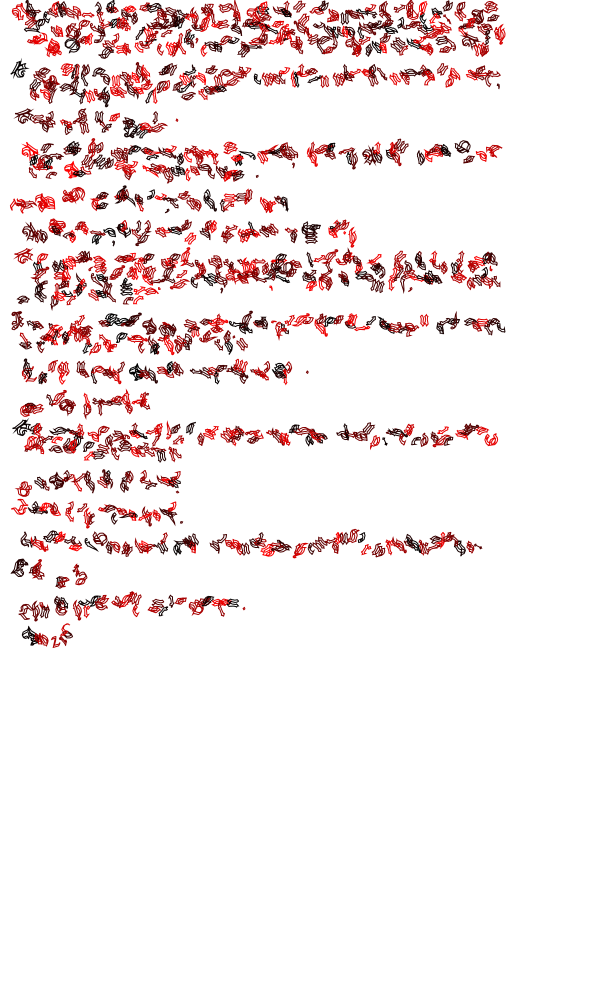

In [276]:
verses = []

num = 15
for i in range(num):
    verses.append(text_model.make_short_sentence(280))
    if(i >= num-2):
        verses.append(data[random.randint(0,random_index)]['book'] + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

width = 600 # 5in
height = 1000 # 4in
border = 3 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border+10
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
            lines = figure.polyline(pline.rotate(uniform(random.randint(0,3)*np.pi)).scale(.02).translate(xoff,yoff))
            # bingo bango bongo
#             print(pline.rotate(uniform(random.randint(0,3)*np.pi)).scale(.02).translate(xoff,yoff).vertices)
            page.place(lines)
        advance = advancefor(f, ch) / f.density * lineheight
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 20
        xoff += int(advance)
        
    xoff = border + 20
    yoff += lineheight + 15
show(page)

In [261]:
def make_cursed_verse():
    
    verse_points = []
    
    verses = []

    num = 15
    for i in range(num):
        verses.append(text_model.make_short_sentence(280))
        if(i >= num-2):
            verses.append(data[random.randint(0,random_index)]['book'] + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
              + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

    width = 600 # 5in
    height = 800 # 4in
    border = 3 # 1/8in
    lineheight = 16 # size of each line
    yoff = border+10  
    xoff = border+10
    cmds = []
    for line in verses:
        line = line.strip() # remove trailing whitespace
        for ch in line:
            cmds = getCommandsPolyline(ch, f)
            if(cmds):
                figure = shape().stroke(rgb(random.randint(0,255), 0,0))
                pline = Polyline(cmds)
                lines = figure.polyline(pline.rotate(uniform(random.randint(0,3)*np.pi))
                                        .scale(.02)
                                        .translate(xoff,yoff))
                # bingo bango bongo
                verse_points.append(pline.rotate(uniform(random.randint(0,3)*np.pi)).scale(.02).translate(xoff,yoff).vertices)
                page.place(lines)
            advance = advancefor(f, ch) / f.density * lineheight
            if(xoff+advance+100 >= width):
                yoff += lineheight + 20
                xoff = border + 20
            xoff += int(advance)

        xoff = border + 20
        yoff += lineheight + 30
    return verse_points

In [262]:
make_cursed_verse()

[array([[ 4.26697373,  4.39347619],
        [ 2.31180148,  5.18549986],
        [ 2.12137746,  5.4426743 ],
        [ 2.67118751,  6.06130902],
        [ 3.06382123,  6.48890552],
        [ 3.08554998,  8.07280193],
        [ 2.42961149,  8.08483096],
        [ 2.16998023,  7.49441448],
        [ 1.85857107,  6.94031672],
        [ 1.79760352,  8.73672507],
        [ 2.56728424,  9.00800278],
        [ 3.06371711,  9.07695497],
        [ 3.49598389,  9.77031305],
        [ 4.04076449, 10.54698164],
        [ 6.73372568, 11.34645647],
        [ 7.17850817, 12.12373926],
        [ 8.12156614, 13.26996859],
        [11.26801278, 13.65865035],
        [13.9729796 , 11.85400231],
        [14.34842733, 11.1116823 ],
        [14.44063208, 10.81911045],
        [14.56731293, 10.27832218],
        [14.72313333,  9.59735228],
        [15.352812  ,  9.2174776 ],
        [15.82089911,  8.9045967 ],
        [16.08573939,  8.71496646],
        [16.22499971,  8.59410884],
        [16.30444541,  8.503

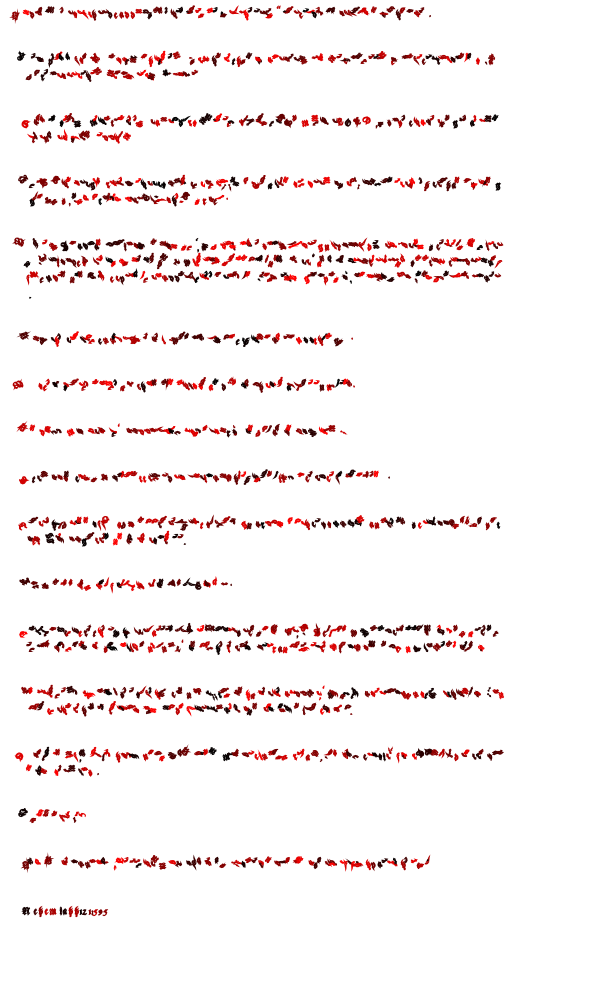

In [275]:
verses = []

num = 15
for i in range(num):
    verses.append(text_model.make_short_sentence(280))
    if(i >= num-2):
        verses.append(data[random.randint(0,random_index)]['book'] + " " + str(random.randrange(int(float(data[random.randint(0,random_index)]['chapter']))))
          + ":" + str(random.randrange(int(float(data[random.randint(0,random_index)]['verse'])))))

width = 600 # 5in
height = 1000 # 4in
border = 3 # 1/8in
lineheight = 16 # size of each line
rectsize = 3 # size of each rectangle
page = document(width, height, 'pt').addpage()
yoff = border+10  
xoff = border+10
cmds = []
for line in verses:
    line = line.strip() # remove trailing whitespace
    for ch in line:
        cmds = getCommandsPolyline(ch, f)
        if(cmds):
            figure = shape().stroke(rgb(random.randint(0,255), 0,0))
            pline = Polyline(cmds)
        if(line != verses[len(verses)-1]):
            lines = figure.polyline(pline.rotate(uniform(random.randint(0,3)*np.pi)).scale(.01).translate(xoff,yoff))
        else:
            lines = figure.polyline(pline.scale(.01).translate(xoff,yoff))
        page.place(lines)
        advance = advancefor(f, ch) / f.density * lineheight
        if(xoff+advance+100 >= width):
            yoff += lineheight
            xoff = border + 20
        xoff += int(advance)
        
    xoff = border + 20
    yoff += lineheight + 30
show(page)